### Data Set Setup ###

In [37]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)


ca = filter(county, state =="California")

# Selected variables to use for analysis
ca_poverty = select(ca, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')

# Loading 2016, 2017, 2019 poverty demographics dataset
# Each variable consists of deeper view of the demographics of the population experiencing poverty

demo2016 = read.table("2016_poverty_demographics.csv", sep = ",", header = TRUE)
demo2017 = read.table("2017_poverty_demographics.csv", sep = ",", header = TRUE)
demo2019 = read.table("2019_poverty_demographics.csv", sep = ",", header = TRUE)

ca_demo2016 = filter(demo2016, state == 'California')
ca_demo2017 = filter(demo2017, state == 'California')
ca_demo2019 = filter(demo2019, state == 'California')

name,pop2016,pop2017,pop_2019,poverty_age_under_18_2017,poverty_under_18_2019,poverty_2016,poverty_2017,poverty_2019,median_household_income_2016,...,bachelors_2017,bachelors_2019,unemployment_rate_2017,unemployment_rate_2019,uninsured_2017,uninsured_2019,uninsured_age_under_19_2017,uninsured_under_19_2019,per_capita_income_2017,per_capita_income_2019
Alameda County,1653236,1663190,1656754,12.8,11.3,10.7,11.3,9.9,89472,...,44.7,47.4,3.64,4.4,6.9,4.4,3.2,2.1,40686.83,47314
Alpine County,1057,1120,1039,14.8,NA,18.6,19.8,NA,57481,...,25.6,34.5,6.13,15.6,12.1,8.9,10.9,3.7,23696.35,36739
Amador County,37473,38626,38429,19.1,NA,11.3,10.6,NA,59789,...,22.1,19.3,4.90,6.6,5.6,4.7,4.8,3.4,31931.22,31987
Butte County,226525,229294,225817,20.9,19.6,19.5,20.5,19.1,45097,...,26.6,27.2,5.74,7.7,8.4,6.2,4.3,3.2,26083.07,29506
Calaveras County,45315,45670,45514,18.4,NA,13.1,12.8,NA,57990,...,19.3,18.3,4.73,6.6,6.6,4.4,3.4,0.7,30857.60,33456
Colusa County,21645,21805,21454,20.6,NA,11.1,14.0,NA,54861,...,15.7,15.0,14.34,4.4,13.6,9.8,2.4,3.0,25121.85,26932
Contra Costa County,1138645,1147439,1142251,12.1,10.9,8.7,9.8,8.7,90920,...,40.7,42.4,3.80,5.0,7.2,5.1,3.1,2.6,42237.76,48178
Del Norte County,27450,27470,27495,29.1,NA,23.7,23.2,NA,39458,...,14.4,14.8,6.43,7.8,8.1,6.5,2.5,5.5,22359.60,23674
El Dorado County,186272,188987,188563,11.4,9.6,8.7,9.8,8.4,75100,...,33.3,34.3,4.36,5.4,6.0,4.6,2.8,3.0,37106.69,42749
Fresno County,979534,989255,984521,36.2,32.2,25.5,25.4,22.5,48323,...,20.1,21.2,8.47,8.2,11.7,8.3,4.0,2.9,21715.19,24422


### Graph for 2019 Citizens under 18 that are in Poverty ###

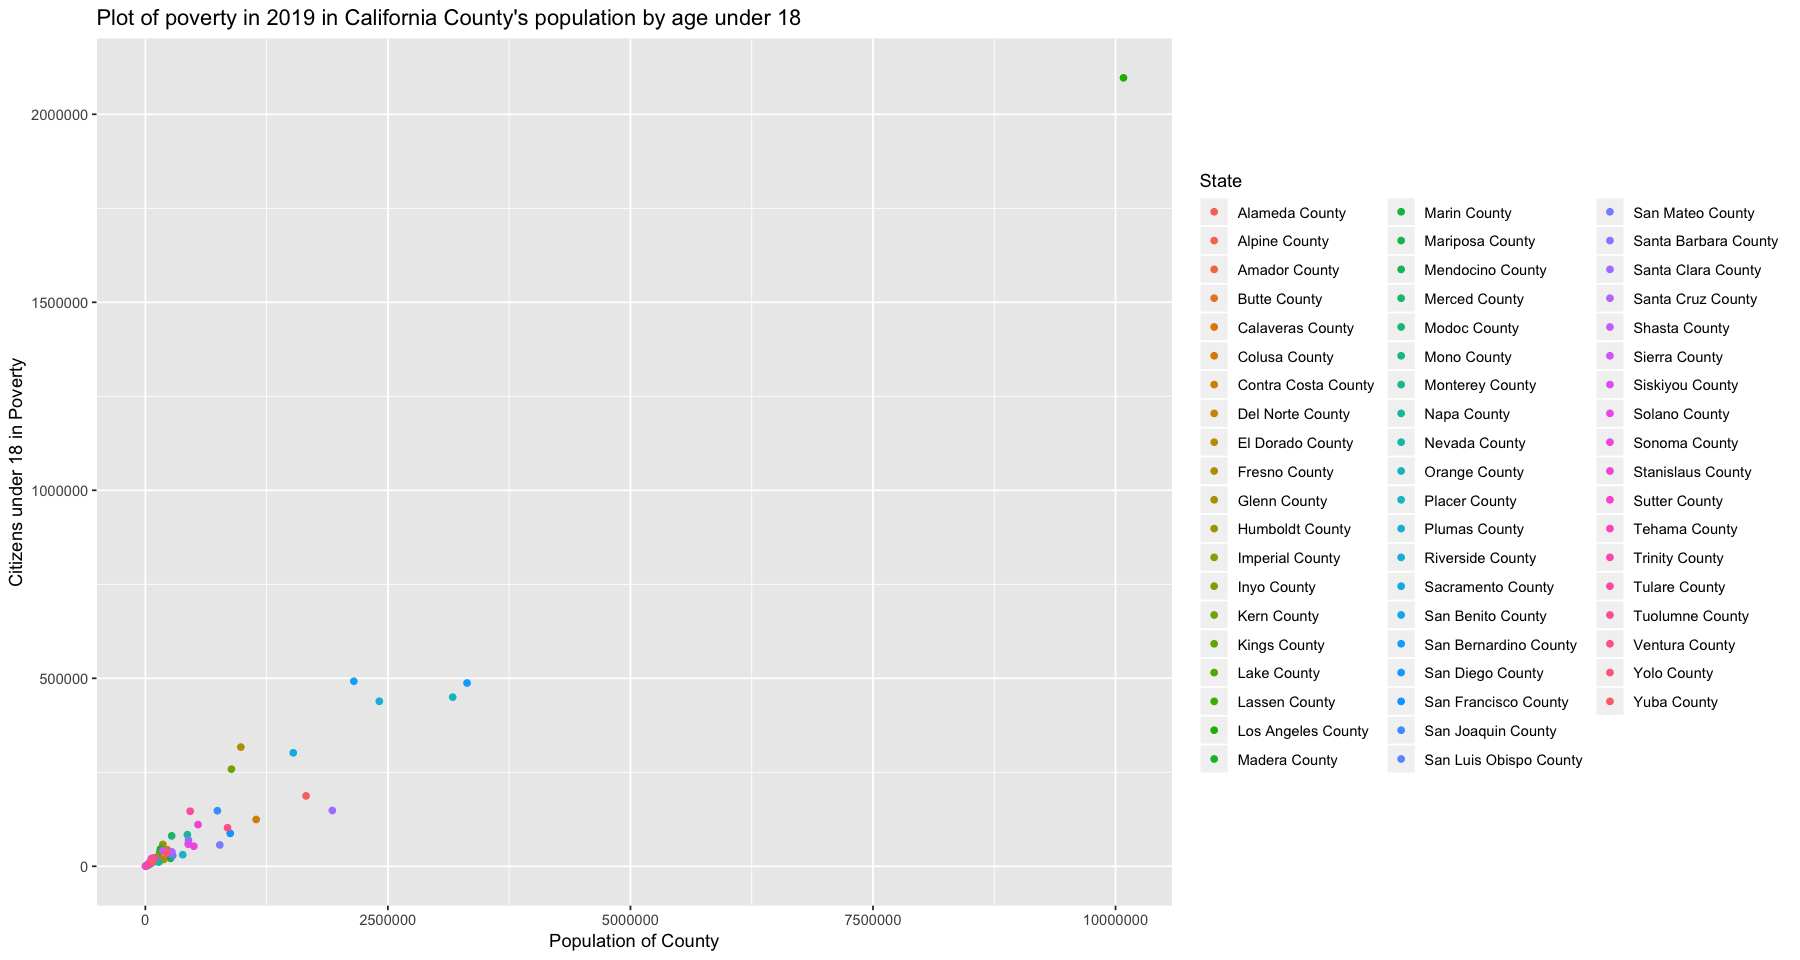

In [19]:
#To remove scientific notation in graph 
options(scipen=10000)


# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
poverty18 = select(ca_poverty, c('name','pop_2019', 'poverty_under_18_2019'))

# Replacing the NA's to the mean of all the poverty levels under 18 in 2019  
poverty18$poverty_under_18_2019[is.na(poverty18$poverty_under_18_2019)] = 0
xbar = mean(poverty18$poverty_under_18_2019)
poverty18[poverty18 == 0] = xbar 


#Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
poverty18$updated = (poverty18$pop_2019 * poverty18$poverty_under_18_2019)/100

# Plot graph in terms of Population in 2019 for each state by poverty under 18 in each state 
plot1 =ggplot(poverty18, aes(poverty18$pop_2019, poverty18$updated, color=poverty18$name)) + 
geom_point() +
ggtitle("Plot of poverty in 2019 in California County's population by age under 18 ") +
xlab("Population of County") + 
ylab("Citizens under 18 in Poverty") + labs(color = "State"); 

#Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

#Plot graph 
plot1

### Graphs for Median household in 2019, % under 18 in Poverty, and Hist ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

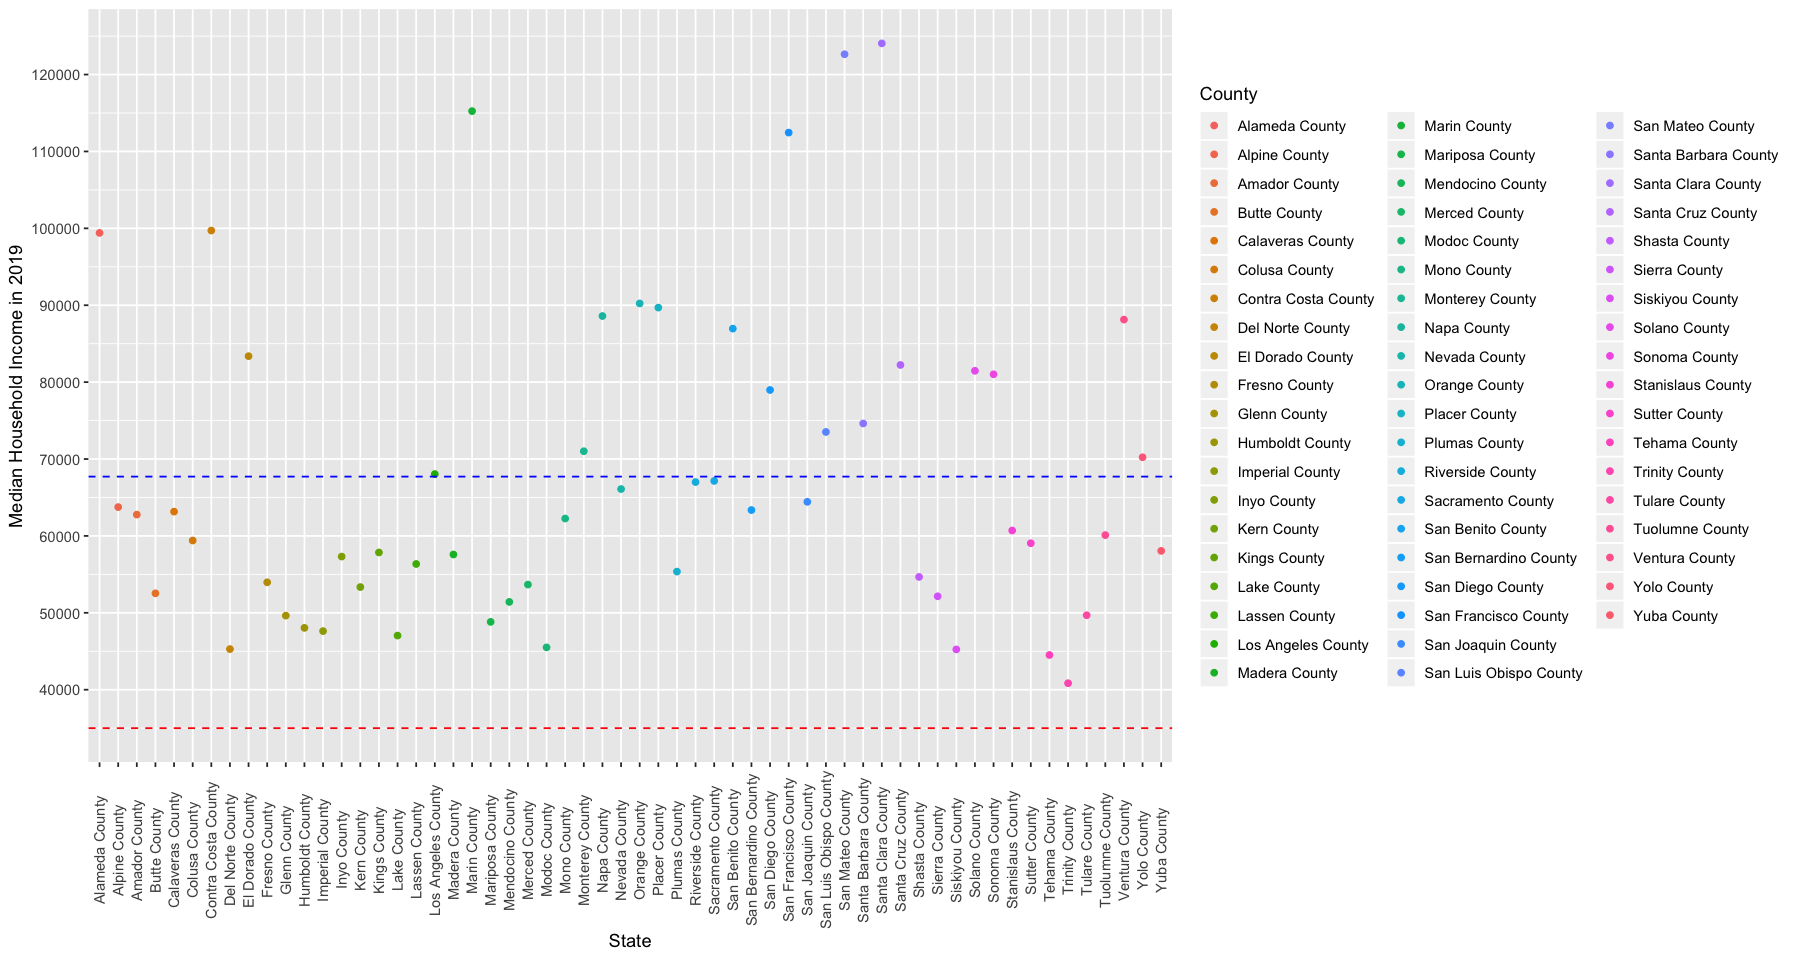

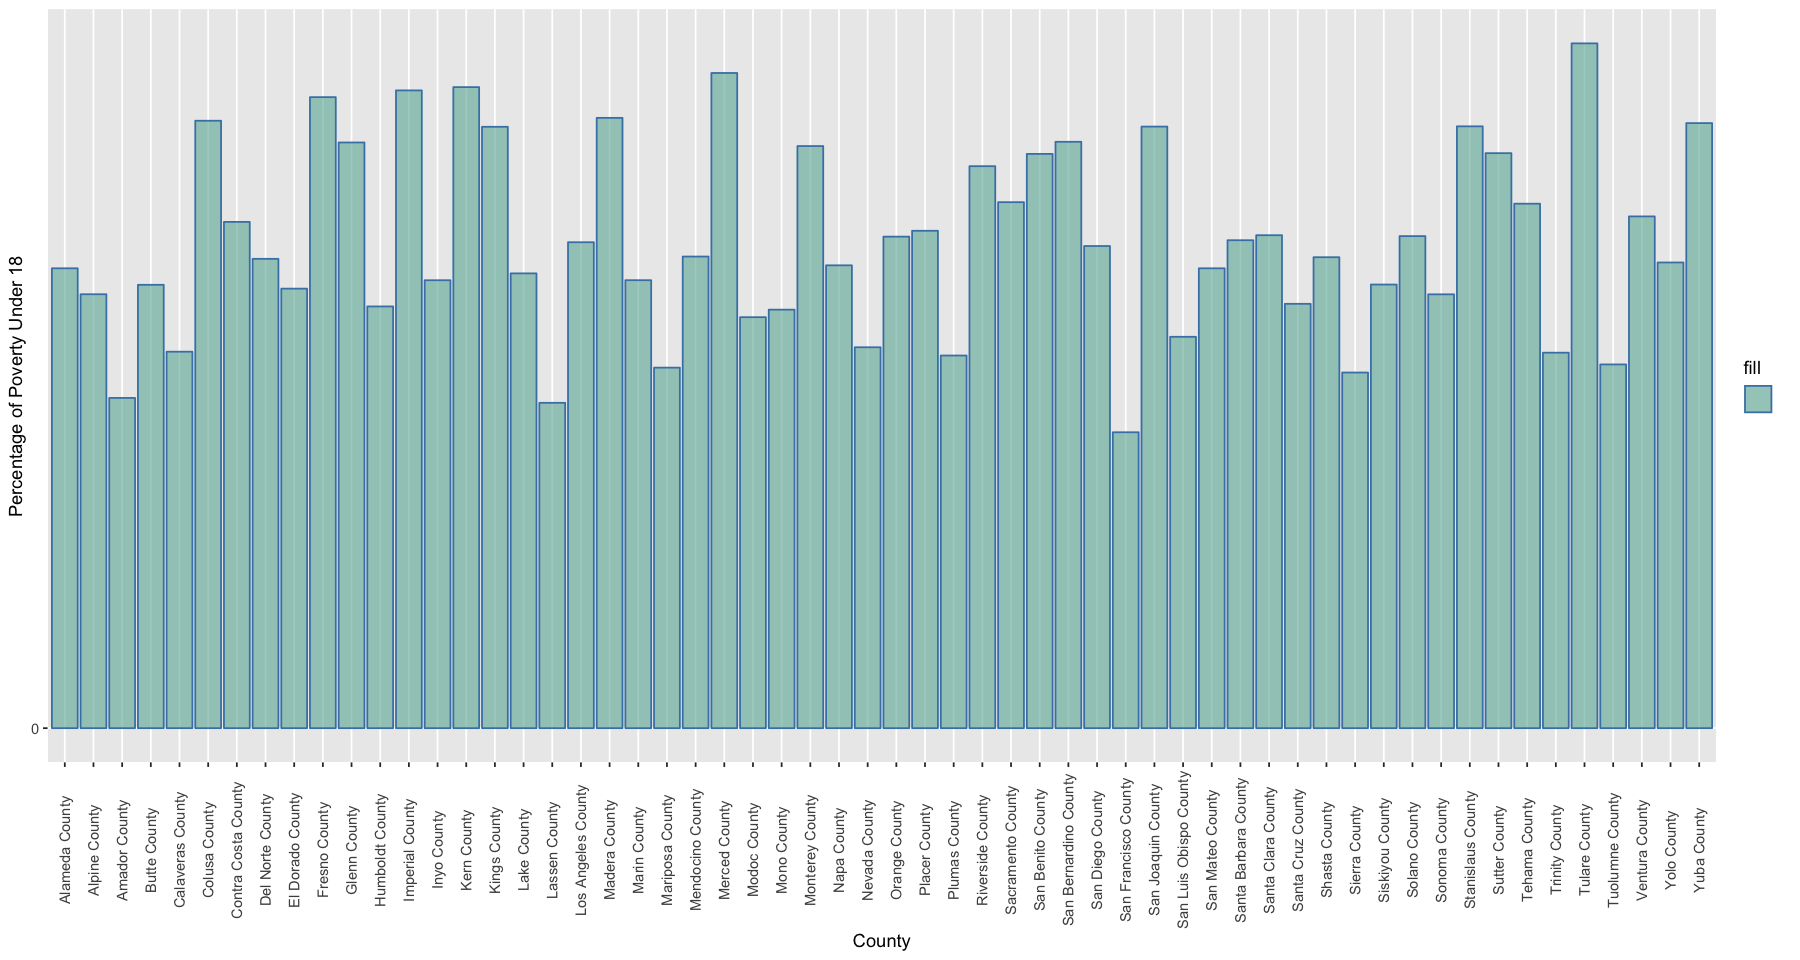

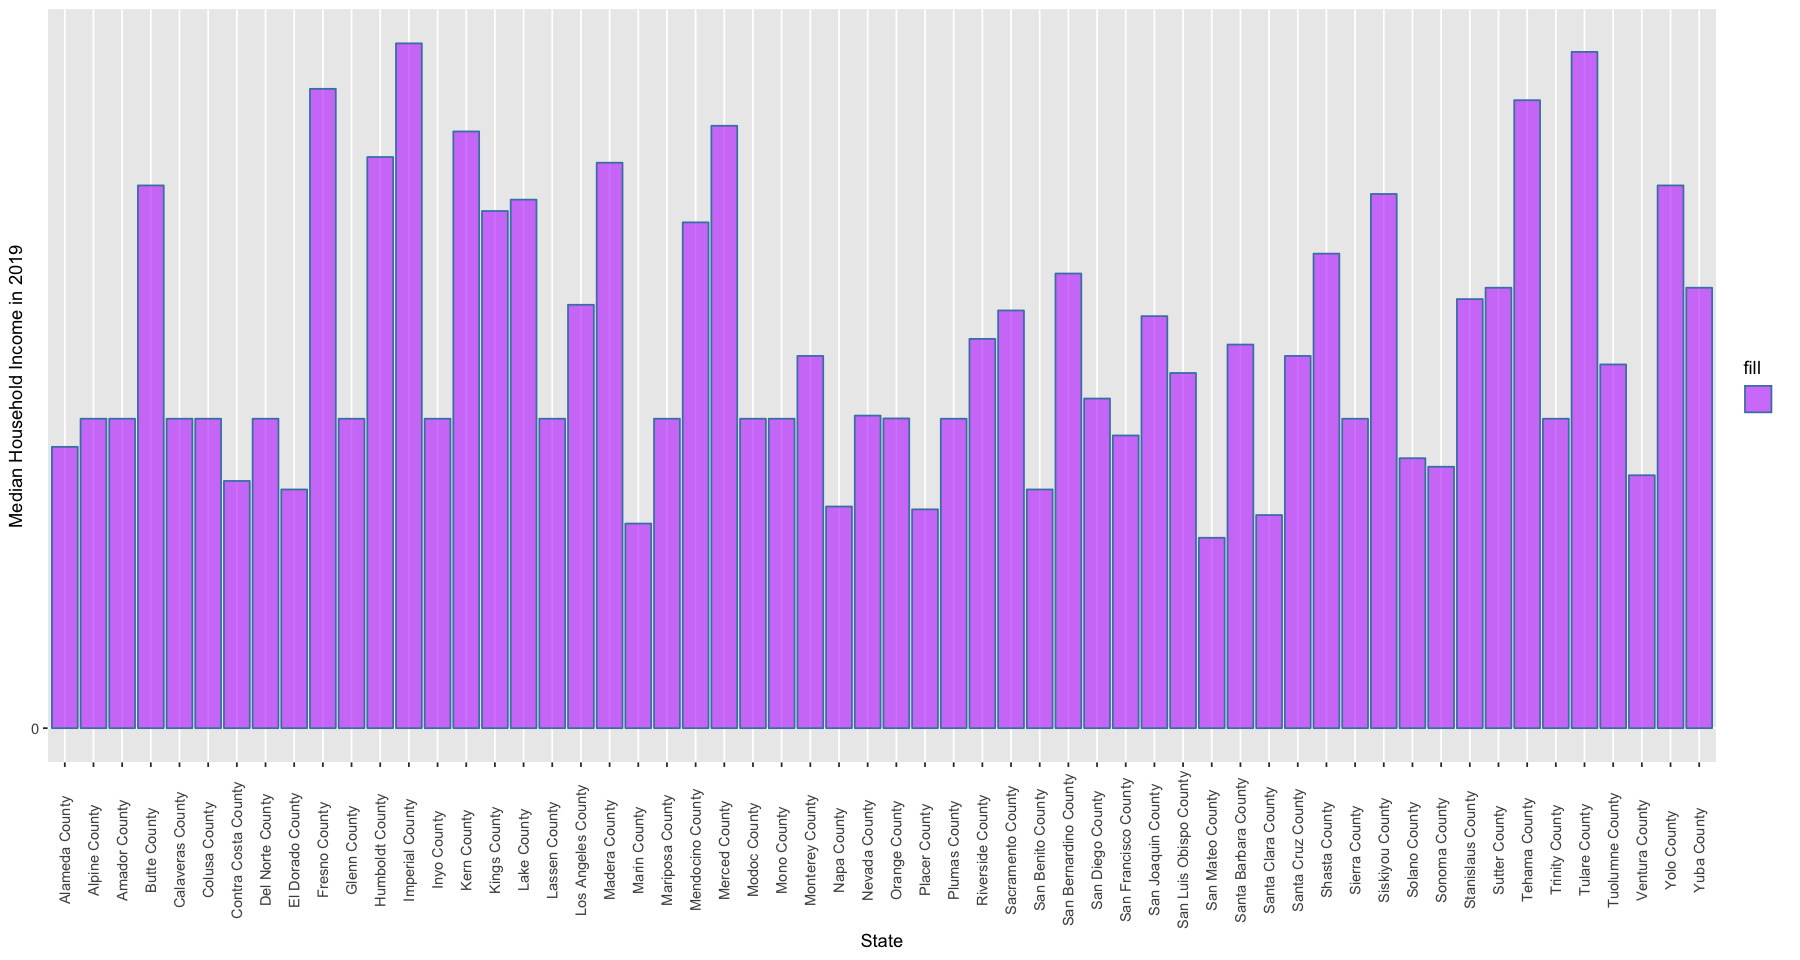

In [43]:
#To remove scientific notation 
options(scipen=10000)

house = select(ca, persons_per_household_2019)
houseBar = colMeans(house)
income = select(ca, median_household_income_2019)
inBar = colMeans(income);

povertLevel = 35000

ca$update = ca_demo2019$under_age_18_poverty/ca$pop_2019

caPov19 = select(ca, name, poverty_2019)


# Replacing the NA's to the mean of all the poverty levels under 18 in 2019  
caPov19$poverty_2019[is.na(caPov19$poverty_2019)] = 0
xbar = mean(caPov19$poverty_2019)
caPov19[caPov19 == 0] = xbar

#Plot median household income for 2019
plot2 <- ggplot(ca, aes(ca$name, ca$median_household_income_2019,color=ca$name)) + 
geom_point() + geom_hline(yintercept=povertLevel, linetype="dashed", color = "red") + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=inBar, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2019") + labs(color = "County") + 
scale_y_continuous(breaks=seq(0,120000,10000))

#Plot 2019 for California's % under 18 in poverty 
plot3 <- ggplot(ca, aes(ca$name, ca$update, fill='')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("#69b3a2")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("County") +
ylab("Percentage of Poverty Under 18") + labs(color = "County") + 
scale_y_continuous(breaks=seq(0,100))

#Histogram of % of population that are in poverty (by county)
plot4 <- ggplot(caPov19, aes(caPov19$name, caPov19$poverty_2019,fill = '')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("darkorchid1")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("State") +
ylab("Median Household Income in 2019") + labs(color = "State") + 
scale_y_continuous(breaks=seq(0,120000,10000))

# Plotting all plots
plot2; 
plot3; 
plot4; 

[1] 0.9876229

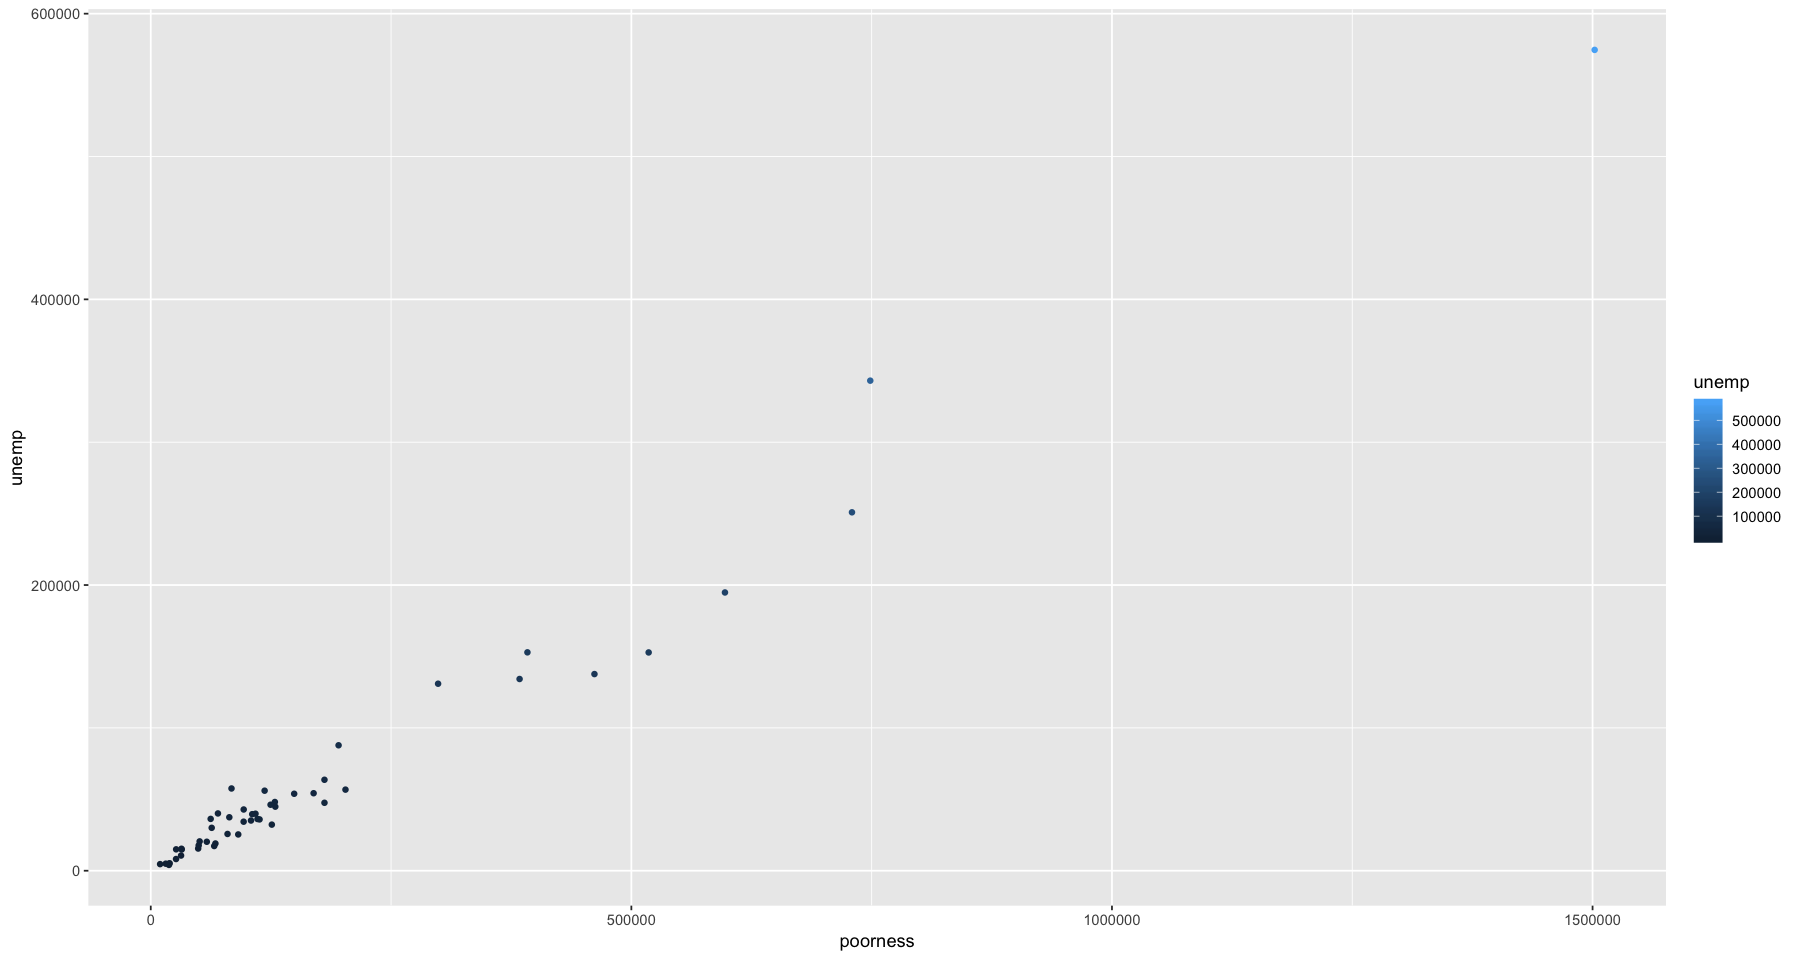

In [19]:
# Correlation between people who are unpemployed and poor
unemp = (pop19$unemployment_rate_2019*poverty18$pop_2019)/100; 
poorness = (pop19$poverty_2019*poverty18$pop_2019)/100; 
cor(unemp, poorness)

#Create dataframe fore unemp and poorness
df = data.frame(unemp, poorness)

#Plot of it
ggplot(df, mapping = aes(x = poorness, y = unemp)) + geom_point(aes(colour = unemp), shape = 16) 

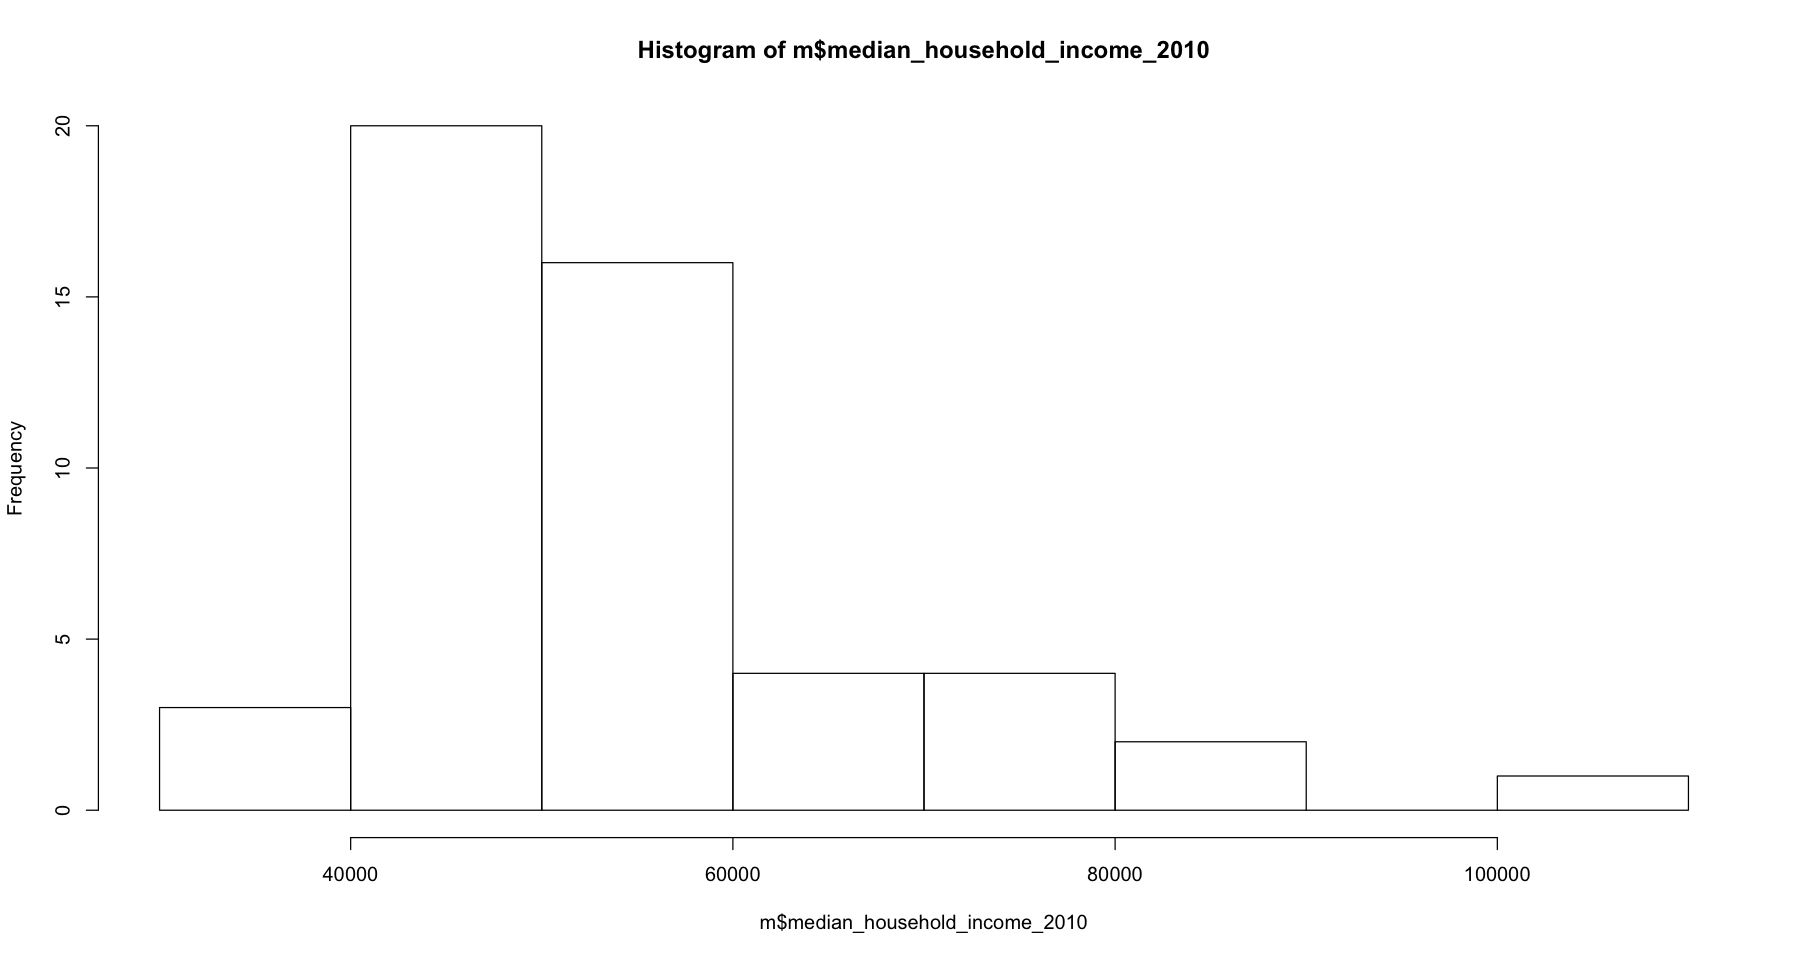

In [20]:
hist(m$median_household_income_2010)

In [21]:
# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
povertyrates = select(pop19, c('state','pop_2019', 'poverty_under_18_2019', 'age_under_5_2019',
                              'age_over_65_2019', 'age_over_18_2019', 'poverty_2019'))
# Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
povertyrates$updated = (povertyrates$pop_2019 * povertyrates$poverty_under_18_2019)/100
povertyrates$pov = (povertyrates$pop_2019 * povertyrates$poverty_2019)/100

# Ajdusted the poverty rate under the age of 5 to scale the proportion of the population (2019)
povertyrates$updated2 = (povertyrates$pop_2019 * povertyrates$age_under_5_2019)/100

# Ajdusted the poverty rate over age of 18 to scale the proportion of the population in 2019
povertyrates$updated3 = (povertyrates$pop_2019 * povertyrates$age_over_18_2019)/100

# Creating vectors for poverty
label = c("Total Sample County Population", "Total Poverty Under 18")

under_18 = c(sum(povertyrates$pop_2019), sum(povertyrates$updated))
df1 = data.frame(label, under_18)

# Creating vectors for poverty
label2 = c("Total Sample County Population", "Total Poverty Under 5")
under_5 = c(sum(povertyrates$pop_2019), sum(povertyrates$updated2))
df2 = data.frame(label2, under_5)

# Creating vectors for poverty
label3 = c("Total Sample County Population", "Total Poverty")
total_pov = c(sum(povertyrates$pop_2019), sum(povertyrates$pov))
df3 = data.frame(label3, total_pov)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

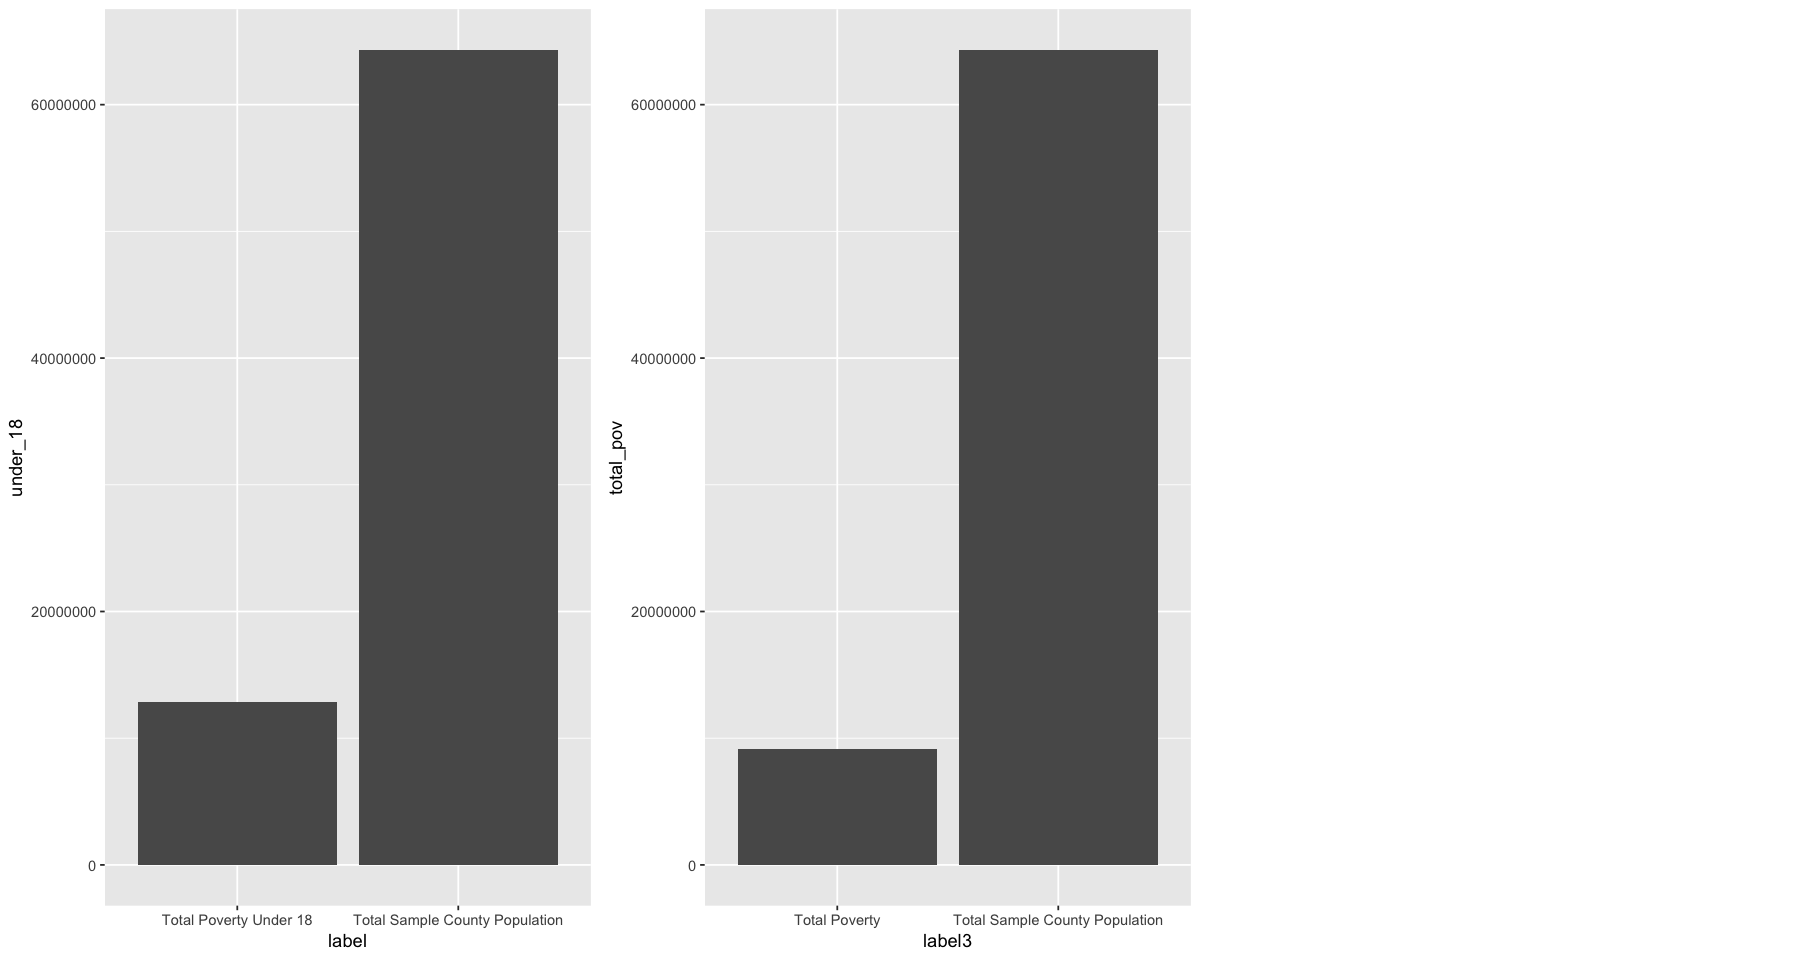

In [22]:
library(gridExtra)
p1 <- ggplot(df1) +
        geom_histogram(aes(x = label, y = under_18), stat = 'identity')

#p2 <- ggplot(df2) +
        #geom_histogram(aes(x = label2, y = under_5), stat = 'identity')

p3 <- ggplot(df3) +
        geom_histogram(aes(x = label3, y = total_pov), stat = 'identity')

grid.arrange(p1, p3, ncol = 3)

In [23]:
# Filter Minnesota and California
minn = filter(county, state == 'Minnesota')
cali = filter(county, state == "California")

# Selecting variables that consists of poverty, population, education, unemployement rates, 
# insured/uninsured, etc..

cali_poverty = select(cali, 'name', 'pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019')
